<a href="https://colab.research.google.com/github/danihga/Jovia/blob/main/Clusteirng_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the association between the questions answered

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [90]:
#Import Data

data = pd.read_excel(r'/Users/familiadelasherasgarciahijosdanielnuriapablo/Documents/Applied Math and Data Science/Jovia/DeidentifiedSDOHPatientData-v1.xlsx')

data.sample(6)

data.columns = ['id', 'age', 'race', 'ethnicity', 'gender',
       'food would run out',
       'Food didn’t last and no money for more',
       'Lack transportation kept from medical appointments or medications?',
       'Lack transportation kept from meetings, work, or things needed for daily living?',
       'Not able to pay the mortgage or rent on time?',
       'Not have a steady place to sleep or slept in a shelter?',
       'Electric, gas, oil, or water company threatened to shut off services?',
       'Fearful of physical/emotional abuse from relative?']

# Drop id, age, race, ethnicity, gender
data.drop(columns = ['id', 'age', 'race', 'ethnicity', 'gender'], inplace = True)

data.sample(6)

,food would run out,Food didn’t last and no money for more,Lack transportation kept from medical appointments or medications?,"Lack transportation kept from meetings, work, or things needed for daily living?",Not able to pay the mortgage or rent on time?,Not have a steady place to sleep or slept in a shelter?,"Electric, gas, oil, or water company threatened to shut off services?",Fearful of physical/emotional abuse from relative?
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3519,Never True,Never True,No,No,No,No,No,No
14822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
data.shape

(15843, 8)

In [81]:
data.isnull().sum()/15843

food would run out                                                                  0.296598
Food didn’t last and no money for more                                              0.297166
Lack transportation kept from medical appointments or medications?                  0.436660
Lack transportation kept from meetings, work, or things needed for daily living?    0.437102
Not able to pay the mortgage or rent on time?                                       0.457552
Not have a steady place to sleep or slept in a shelter?                             0.457931
Electric, gas, oil, or water company threatened to shut off services?               0.437796
Fearful of physical/emotional abuse from relative?                                  0.734267
dtype: float64

In [92]:
for i in data.columns:
    data[i] = data[i].map({'Never True':1, 'Patient unable to answer':0, 'Patient declined':0,
       'Sometimes True':1, 'Often True':2, 'No':1, 'Yes':2, 'Already Shut Off':2 })

In [93]:
data.fillna(0, inplace = True)

## Label Encoding Approach

**Proportions of the answers to the questions and Encode Questions**

In [94]:
data['food would run out'].value_counts(normalize=True, dropna=False)#.cumsum()


food would run out
1.0    0.649498
0.0    0.347598
2.0    0.002903
Name: proportion, dtype: float64

In [95]:
data['Food didn’t last and no money for more'].value_counts(normalize=True,dropna=False)#.cumsum()

Food didn’t last and no money for more
1.0    0.649056
0.0    0.347977
2.0    0.002967
Name: proportion, dtype: float64

In [96]:
data['Lack transportation kept from medical appointments or medications?'].value_counts(normalize=True,dropna=False)#.cumsum()

Lack transportation kept from medical appointments or medications?
1.0    0.500978
0.0    0.490311
2.0    0.008710
Name: proportion, dtype: float64

In [97]:
data['Lack transportation kept from meetings, work, or things needed for daily living?'].value_counts(normalize=True,dropna=False)#.cumsum()

Lack transportation kept from meetings, work, or things needed for daily living?
1.0    0.501988
0.0    0.490437
2.0    0.007574
Name: proportion, dtype: float64

In [98]:
data['Not able to pay the mortgage or rent on time?'].value_counts(normalize=True,dropna=False)#.cumsum()

Not able to pay the mortgage or rent on time?
1.0    0.498769
0.0    0.491700
2.0    0.009531
Name: proportion, dtype: float64

In [99]:
data['Not have a steady place to sleep or slept in a shelter?'].value_counts(normalize=True,dropna=False)#.cumsum()

Not have a steady place to sleep or slept in a shelter?
1.0    0.501736
0.0    0.491447
2.0    0.006817
Name: proportion, dtype: float64

In [100]:
data['Electric, gas, oil, or water company threatened to shut off services?'].value_counts(normalize=True,dropna=False)#.cumsum()

Electric, gas, oil, or water company threatened to shut off services?
1.0    0.502556
0.0    0.491321
2.0    0.006123
Name: proportion, dtype: float64

In [101]:
data['Fearful of physical/emotional abuse from relative?'].value_counts(normalize=True,dropna=False)#.cumsum()

Fearful of physical/emotional abuse from relative?
0.0    0.755349
1.0    0.240169
2.0    0.004481
Name: proportion, dtype: float64

## Clustering

### PCA

In [120]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

# get the 3 Principal Components
pca = PCA()

# Map data to the principal compomponents
pca_data = pd.DataFrame(data = pca.fit_transform(data))

columns = [f'PCA {i+1}' for i in pca_data.columns]

pca_data.columns = columns

# Explained Variance By the three principal components
explained_variance = pca.explained_variance_ratio_


In [123]:
pca_data.sample(6)

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
13779,-0.849674,0.931460,0.212777,-0.002582,0.000638,-0.003444,0.000099,0.000912
7293,1.312552,-0.193120,0.457530,0.006900,-0.003774,0.005739,0.000119,-0.000264
9471,1.109372,0.102234,-0.475972,0.000080,-0.004400,0.006769,-0.002867,-0.000295
2038,1.312552,-0.193120,0.457530,0.006900,-0.003774,0.005739,0.000119,-0.000264
13660,1.109372,0.102234,-0.475972,0.000080,-0.004400,0.006769,-0.002867,-0.000295
14959,-1.467941,-0.313701,-0.046640,0.000914,0.003085,-0.001212,0.000177,0.000489


In [ ]:
#pip install yellowbrick

Elbow Method to determine the number of clusters to be formed:


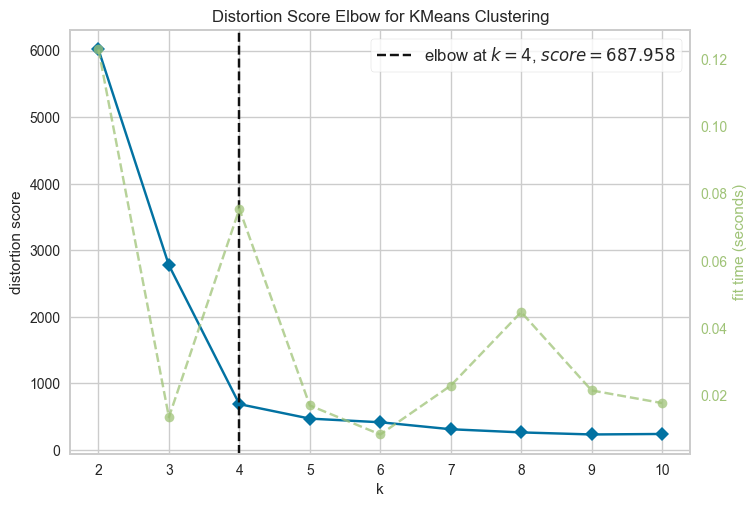

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [130]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_data.iloc[:,:3])
Elbow_M.show()

In [124]:
# Elbow method to determine the appropiate number of clusters
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def do_kmeans(data, clusters: int = 3):